In [3]:
# Importing all neccessary libraries for EDA, Data Preprocessing and Model Building and hyperparameter tuning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Importing the dataset

parkinsons_data = pd.read_csv('parkinsson_disease.csv')

---
## EDA
---
### Data Understanding

In [5]:
# Data Understanding

# Checking the first 5 rows of the dataset
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
# Describing the dataset
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,154.19014,192.905336,111.228696,0.006721,0.000048,0.003548,0.003912,0.010637,0.031452,0.311788,...,0.050799,0.027357,21.753236,0.772000,0.500531,0.725576,-5.424871,0.235523,2.380643,0.225238
std,41.05497,83.027912,41.138549,0.004879,0.000034,0.002946,0.003000,0.008837,0.019205,0.209333,...,0.030822,0.040969,4.121719,0.420384,0.099490,0.064984,1.147494,0.084092,0.351116,0.100546
min,88.33300,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,118.67000,139.660500,83.204250,0.003840,0.000030,0.001765,0.002030,0.005298,0.017530,0.161500,...,0.026540,0.006865,19.582250,1.000000,0.431865,0.665861,-6.273135,0.183218,2.137458,0.147761
50%,148.11650,166.172500,96.543000,0.005735,0.000040,0.002970,0.003165,0.008905,0.024670,0.236000,...,0.041600,0.015000,22.000000,1.000000,0.481117,0.725934,-5.467201,0.223290,2.352825,0.204568
75%,192.81800,216.686000,121.211000,0.007770,0.000060,0.004010,0.004685,0.011980,0.041000,0.430750,...,0.069637,0.029110,24.596750,1.000000,0.595627,0.775178,-4.557822,0.299948,2.559700,0.296424
max,260.10500,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.850000,-2.434031,0.450493,3.671155,0.527367


In [7]:
# Shape of the dataset
parkinsons_data.shape

(250, 24)

In [10]:
# Dropping the unnecessary columns which are not required for model building
parkinsons_data = parkinsons_data.drop(['name'], axis = 1)

parkinsons_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [11]:
parkinsons_data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.439252,0.541557,-0.092998,-0.356948,-0.029498,-0.150741,-0.030592,-0.147243,-0.154359,...,-0.167949,0.089101,0.021753,-0.394460,-0.173660,-0.561175,-0.378193,-0.327844,0.210119,-0.429713
MDVP:Fhi(Hz),0.439252,1.000000,0.114710,0.071124,-0.069355,0.085126,0.016697,0.084872,-0.044131,-0.032268,...,-0.065731,0.180449,-0.033077,-0.204614,-0.049360,-0.382405,-0.133174,-0.075279,0.190508,-0.155317
MDVP:Flo(Hz),0.541557,0.114710,1.000000,-0.091242,-0.253047,-0.045166,-0.083323,-0.044877,-0.106166,-0.109826,...,-0.144966,-0.013185,0.138917,-0.400465,-0.312610,-0.140347,-0.414361,-0.256013,-0.039381,-0.344658
MDVP:Jitter(%),-0.092998,0.071124,-0.091242,1.000000,0.929371,0.988648,0.960403,0.988782,0.809710,0.827931,...,0.778277,0.871975,-0.741552,0.177585,0.320487,0.163084,0.673385,0.439924,0.439144,0.686884
MDVP:Jitter(Abs),-0.356948,-0.069355,-0.253047,0.929371,1.000000,0.908517,0.896819,0.908584,0.749775,0.761344,...,0.747007,0.763833,-0.658253,0.298889,0.375835,0.264493,0.738096,0.456829,0.316064,0.737696
MDVP:RAP,-0.029498,0.085126,-0.045166,0.988648,0.908517,1.000000,0.927286,0.999987,0.785261,0.792144,...,0.754468,0.899498,-0.742215,0.158140,0.329803,0.086550,0.616520,0.362957,0.444371,0.613091
MDVP:PPQ,-0.150741,0.016697,-0.083323,0.960403,0.896819,0.927286,1.000000,0.927665,0.847076,0.888733,...,0.819831,0.758943,-0.705187,0.201911,0.236135,0.337847,0.724650,0.509131,0.384907,0.782432
Jitter:DDP,-0.030592,0.084872,-0.044877,0.988782,0.908584,0.999987,0.927665,1.000000,0.785718,0.792651,...,0.754911,0.899418,-0.742381,0.157705,0.328674,0.087878,0.616210,0.363599,0.444173,0.613703
MDVP:Shimmer,-0.147243,-0.044131,-0.106166,0.809710,0.749775,0.785261,0.847076,0.785718,1.000000,0.983071,...,0.984776,0.673028,-0.805741,0.285576,0.344002,0.294094,0.660771,0.532897,0.479743,0.715447
MDVP:Shimmer(dB),-0.154359,-0.032268,-0.109826,0.827931,0.761344,0.792144,0.888733,0.792651,0.983071,1.000000,...,0.968247,0.659895,-0.769083,0.274594,0.280326,0.353381,0.687114,0.558740,0.453815,0.752804


In [12]:
# Renaming the column names

parkinsons_data = parkinsons_data.rename(columns = {'MDVP:Fo(Hz)':'Fo (Hz)', 'MDVP:Fhi(Hz)':'Fhi (Hz)', 'MDVP:Flo(Hz)':'Flo (Hz)', 'MDVP:Jitter(%)':'Jitter (%)', 'MDVP:Jitter(Abs)':'Jitter (Abs)', 'MDVP:RAP':'RAP', 'MDVP:PPQ':'PPQ', 'Jitter:DDP':'DDP', 'MDVP:Shimmer':'Shimmer', 'MDVP:Shimmer(dB)':'Shimmer (dB)', 'Shimmer:APQ3':'APQ3', 'Shimmer:APQ5':'APQ5', 'MDVP:APQ':'APQ', 'Shimmer:DDA':'DDA'})

parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fo (Hz)       250 non-null    float64
 1   Fhi (Hz)      250 non-null    float64
 2   Flo (Hz)      250 non-null    float64
 3   Jitter (%)    250 non-null    float64
 4   Jitter (Abs)  250 non-null    float64
 5   RAP           250 non-null    float64
 6   PPQ           250 non-null    float64
 7   DDP           250 non-null    float64
 8   Shimmer       250 non-null    float64
 9   Shimmer (dB)  250 non-null    float64
 10  APQ3          250 non-null    float64
 11  APQ5          250 non-null    float64
 12  APQ           250 non-null    float64
 13  DDA           250 non-null    float64
 14  NHR           250 non-null    float64
 15  HNR           250 non-null    float64
 16  status        250 non-null    int64  
 17  RPDE          250 non-null    float64
 18  DFA           250 non-null    

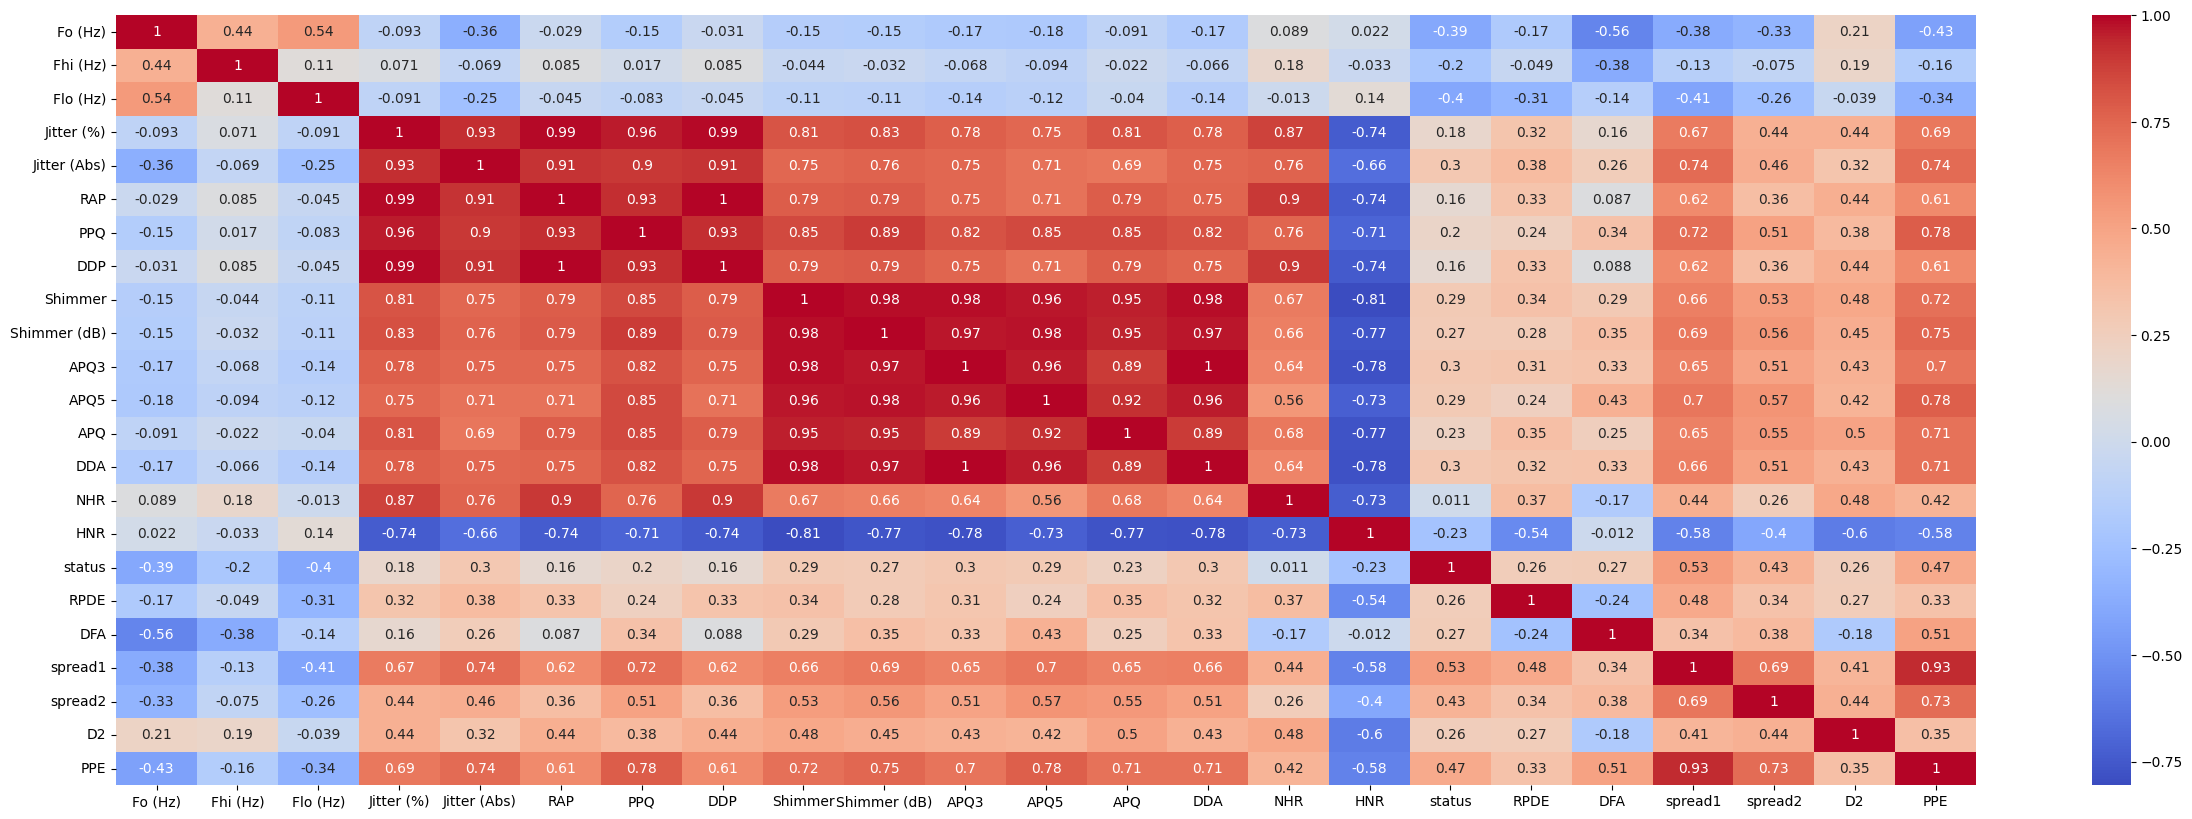

,Fo (Hz),Fhi (Hz),Flo (Hz),Jitter (%),Jitter (Abs),RAP,PPQ,DDP,Shimmer,Shimmer (dB),...,DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
Fo (Hz),1.000000,0.439252,0.541557,-0.092998,-0.356948,-0.029498,-0.150741,-0.030592,-0.147243,-0.154359,...,-0.167949,0.089101,0.021753,-0.394460,-0.173660,-0.561175,-0.378193,-0.327844,0.210119,-0.429713
Fhi (Hz),0.439252,1.000000,0.114710,0.071124,-0.069355,0.085126,0.016697,0.084872,-0.044131,-0.032268,...,-0.065731,0.180449,-0.033077,-0.204614,-0.049360,-0.382405,-0.133174,-0.075279,0.190508,-0.155317
Flo (Hz),0.541557,0.114710,1.000000,-0.091242,-0.253047,-0.045166,-0.083323,-0.044877,-0.106166,-0.109826,...,-0.144966,-0.013185,0.138917,-0.400465,-0.312610,-0.140347,-0.414361,-0.256013,-0.039381,-0.344658
Jitter (%),-0.092998,0.071124,-0.091242,1.000000,0.929371,0.988648,0.960403,0.988782,0.809710,0.827931,...,0.778277,0.871975,-0.741552,0.177585,0.320487,0.163084,0.673385,0.439924,0.439144,0.686884
Jitter (Abs),-0.356948,-0.069355,-0.253047,0.929371,1.000000,0.908517,0.896819,0.908584,0.749775,0.761344,...,0.747007,0.763833,-0.658253,0.298889,0.375835,0.264493,0.738096,0.456829,0.316064,0.737696
RAP,-0.029498,0.085126,-0.045166,0.988648,0.908517,1.000000,0.927286,0.999987,0.785261,0.792144,...,0.754468,0.899498,-0.742215,0.158140,0.329803,0.086550,0.616520,0.362957,0.444371,0.613091
PPQ,-0.150741,0.016697,-0.083323,0.960403,0.896819,0.927286,1.000000,0.927665,0.847076,0.888733,...,0.819831,0.758943,-0.705187,0.201911,0.236135,0.337847,0.724650,0.509131,0.384907,0.782432
DDP,-0.030592,0.084872,-0.044877,0.988782,0.908584,0.999987,0.927665,1.000000,0.785718,0.792651,...,0.754911,0.899418,-0.742381,0.157705,0.328674,0.087878,0.616210,0.363599,0.444173,0.613703
Shimmer,-0.147243,-0.044131,-0.106166,0.809710,0.749775,0.785261,0.847076,0.785718,1.000000,0.983071,...,0.984776,0.673028,-0.805741,0.285576,0.344002,0.294094,0.660771,0.532897,0.479743,0.715447
Shimmer (dB),-0.154359,-0.032268,-0.109826,0.827931,0.761344,0.792144,0.888733,0.792651,0.983071,1.000000,...,0.968247,0.659895,-0.769083,0.274594,0.280326,0.353381,0.687114,0.558740,0.453815,0.752804


In [13]:
# Correlation matrix
correlation = parkinsons_data.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(30,10))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.show()

parkinsons_data.corr()

# Data Visulization

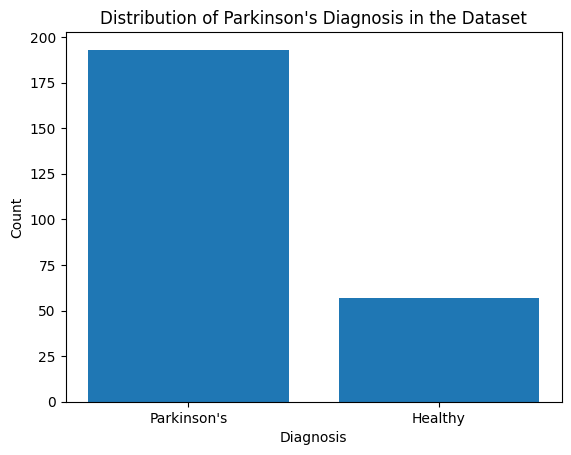

In [14]:
# Count the number of individuals with and without Parkinson's disease
parkinson_count = parkinsons_data["status"].value_counts()[1]  # Count for Parkinson's (1)
healthy_count = parkinsons_data["status"].value_counts()[0]  # Count for Healthy (0)

# Create a bar chart to visualize the counts
plt.bar(["Parkinson's", "Healthy"], [parkinson_count, healthy_count])
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Distribution of Parkinson's Diagnosis in the Dataset")
plt.show()

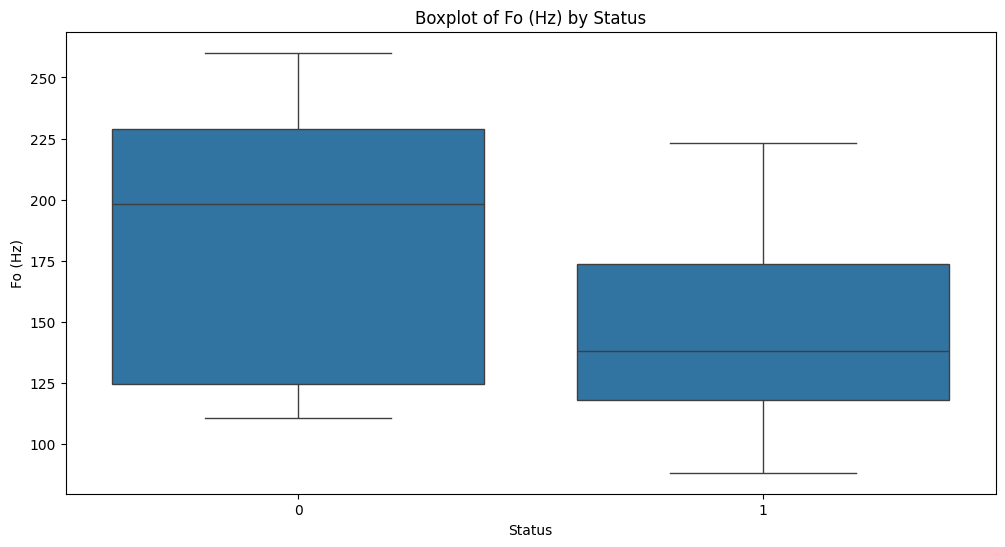

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='status', y='Fo (Hz)', data=parkinsons_data)
plt.title('Boxplot of Fo (Hz) by Status')
plt.xlabel('Status')
plt.ylabel('Fo (Hz)')
plt.show()

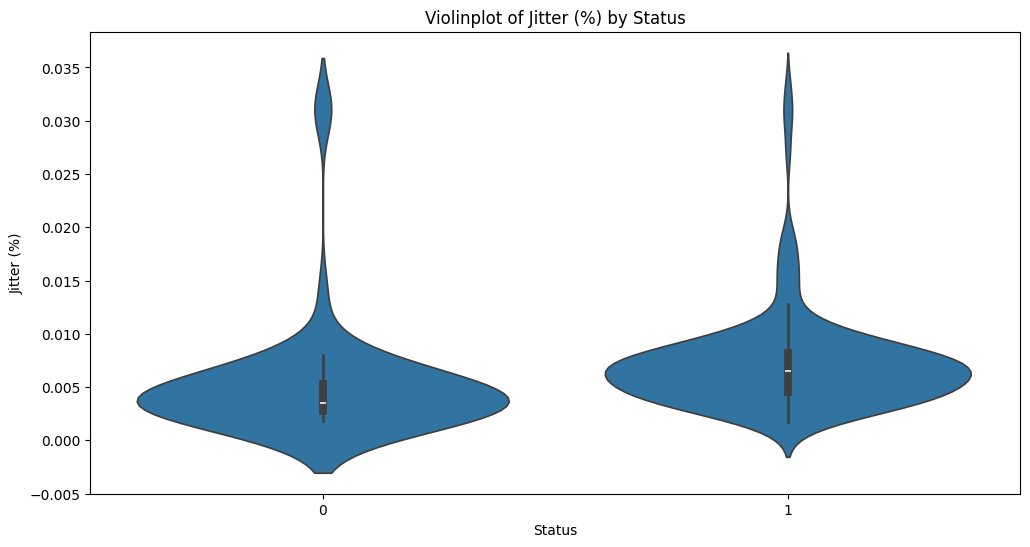

In [16]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='status', y='Jitter (%)', data=parkinsons_data)
plt.title('Violinplot of Jitter (%) by Status')
plt.xlabel('Status')
plt.ylabel('Jitter (%)')
plt.show()

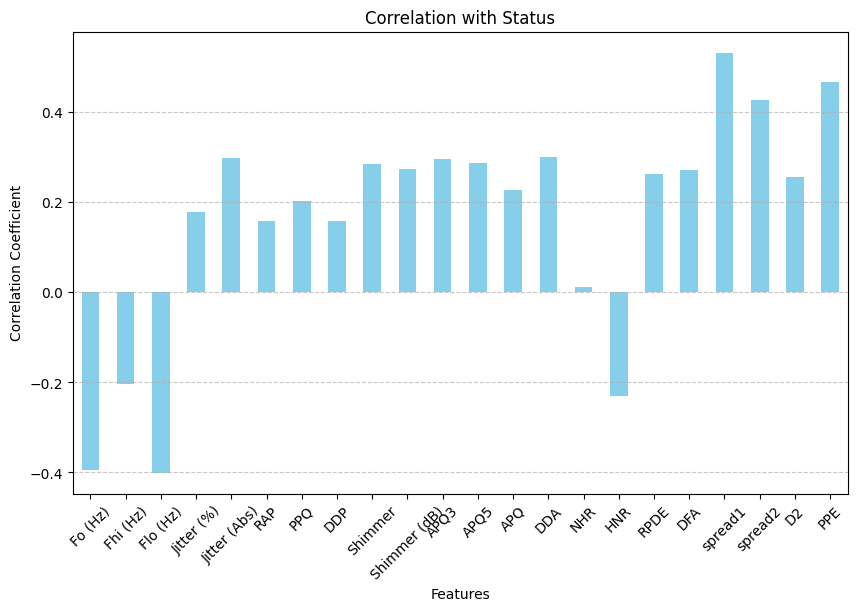

In [17]:
corr_with_status = parkinsons_data.corr()['status'].drop('status')
corr_with_status.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Correlation with Status')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

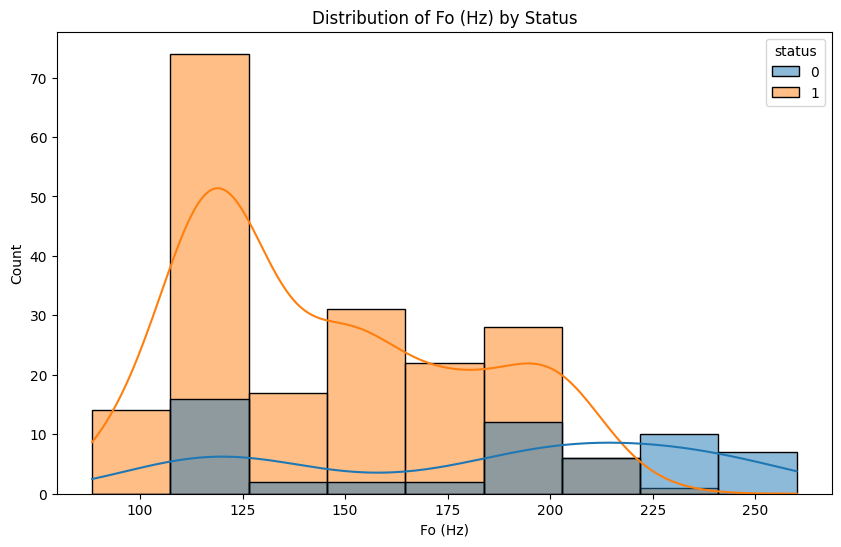

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=parkinsons_data, x='Fo (Hz)', hue='status', kde=True)
plt.title('Distribution of Fo (Hz) by Status')
plt.xlabel('Fo (Hz)')
plt.ylabel('Count')
plt.show()